# Introduction to the NCAS CF Data Tools, cf-python and cf-plot

## Context and learning objectives

### What are the NCAS CF Data Tools and why do they all have 'cf' in the name?

The _NCAS CF Data Tools_ are a suite of complementary Python libraries which are designed to facilitate working with data for research in the earth sciences and aligned domains. The two that are of most relevance to the average user, and those wanting to process, analyse and visualise atmospheric data, are *cf-python* (https://ncas-cms.github.io/cf-python/) and *cf-plot* (https://ncas-cms.github.io/cf-plot/build/). We will be focusing on use of cf-python and cf-plot today.

The 'cf' in the names of the NCAS CF Data Tools corresponds to the _CF Conventions_, a metadata standard, because they are built around this standard in the form of using the CF Data Model, which as well as performance is considered a 'unique selling point' of the tools.


### What are the CF Conventions?

The _CF Conventions_, usually referred to in this way but also know by the full name of the **C**limate and **F**orecast (CF) metadata conventions, are a metadata standard which is becoming the de-facto convention to cover the description of geoscientific data so that sharing and intercomparison is simpler. See https://cfconventions.org/ for more information.


### What are we going to learn in this session?

Our **learning aim** is to be able to use the NCAS CF Data Tools Python libraries, namely cf-python and cf-plot to process, analyse and visualise netCDF and PP datasets, whilst appreciating the context and 'unique selling point' of the libraries as being built to use the CF Conventions, a metadata standard for earth science data, to make it simpler to do what you want to do with the datasets, by working on top of a Data Model for CF.

We have **six distinct objectives**, matching the sections in this notebook and in the practical notebook you will work through. By the end of this lesson you should be familiar and have practiced using cf-python and cf-plot to:

1. read dataset(s) and view the (meta)data at different detail levels;
2. edit the (meta)data and write out the edited version to file;
3. reduce datasets by subspacing and collapsing;
4. visualise datasets as contour and vector plots;
5. analyse data: applying mathematical and statistical operations and plotting trends;
6. change the underlying grid of data through regridding.

<div class="alert alert-block alert-warning">
<i>Note:</i> much of what you can do with cf-python you can do with the xarray library. Use whichever approach, the cf-python/cf-plot way, or the xarray way, works best for you! However, we want to emphasise that the NCAS CF Data Tools are built around the CF Conventions whereas xarray is not, so cf-python and cf-plot offer better metadata awareness to xarray, which could be a core advantage to our approach for users in/from geoscience. (If you have suggestions for how we can improve cf-python and/or cf-plot for you or your work, please let us know through the Issue Trackers linked at the end of this Notebook.)
</div>

***

## Setting up

**In this section we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries within this notebook.**

Run some set up for nice outputs in this Jupyter Notebook (not required in interactive Python or a script):

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Import cf-python and cf-plot:

In [2]:
import cfplot as cfp
import cf

Inspect the versions of cf-python and cf-plot and the version of the CF Conventions those are matched to:

In [3]:
print("cf-python version is:", cf.__version__)
print("cf-plot version is:", cfp.__version__)
print("CF Conventions version is:", cf.CF())

cf-python version is: 3.17.0
cf-plot version is: 3.3.0
CF Conventions version is: 1.11


<div class="alert alert-block alert-warning">
<i>Note:</i> you can work with data compliant by any other version of the CF Conventions, or without (much) compliance, but the CF Conventions version gives the maximum version that these versions of the tools understand the features of.
</div>

Finally, see what datasets we have to explore:

<div class="alert alert-block alert-warning">
<i>Note:</i> in a Jupyter Notebook, '!' preceeeds a shell command, so this is a terminal command and not Python
</div>

In [4]:
!ls ../ncas_data

aaaaoa.pmh8dec.pp			   precip_2010.nc
alpine_precip_DJF_means.nc		   precip_DJF_means.nc
data1.nc				   qbo.nc
data1-updated.nc			   regions.nc
data2.nc				   ta.nc
data3.nc				   tripolar.nc
data5.nc				   ua.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  u_n216.nc
land.nc					   u_n96.nc
model_precip_DJF_means_low_res.nc	   vaAMIPlcd_DJF.nc
model_precip_DJF_means.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc
precip_1D_yearly.nc


***

## 1. Reading dataset(s) and viewing the (meta)data at different detail levels

**In this section we look at the basic use of cf-python, reading in one or more datasets from file and inspecting the data and the metadata at different levels of detail to suit the amount of information you want to see.**

# [TODO explain 'field' and related Data Model concepts very briefly, with diagram?]

### a) Reading in data and extracting the _field_ of interest

Read a chosen data file. Sometimes datasets have descriptive names but this one doesn't, so let's find out what it is!

In [5]:
fieldlist = cf.read("../ncas_data/data1.nc")

See the 'fieldlist' that cf-python interprets from the data read in:

In [6]:
fieldlist

[<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

Select a particular field from the fieldlist of interest:

In [7]:
field = fieldlist[0]

### b) Inspecting the _field_ of interest with different amounts of detail

View the field with **minimal detail**, i.e. a one-line summary:

In [8]:
field

<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>

Or you can view it with a **medium level of detail** with the Python built-in `print` function:

In [9]:
print(field)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


A final option is to view it with **maximal detail** using the `dump()` method:

In [10]:
field.dump()

-----------------------------------------------
Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Conventions = 'CF-1.7'
_FillValue = 2e+20
date = '21/01/64'
history = 'Sun Sep 16 11:26:16 BST 2012 - CONVSH V1.92 16-February-2006'
long_name = 'Potential vorticity'
missing_value = 2e+20
name = 'PV'
source = 'GRIB data'
time = '00:00'
title = 'Potential vorticity'
units = 'K m**2 kg**-1 s**-1'
valid_max = 0.018913519
valid_min = -0.008174051

Data(time(1), pressure(23), latitude(160), longitude(320)) = [[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1

Domain Axis: latitude(160)
Domain Axis: longitude(320)
Domain Axis: pressure(23)
Domain Axis: time(1)

Dimension coordinate: time
    long_name = 't'
    standard_name = 'time'
    time_origin = '21-JAN-1964:00:00:00'
    units = 'days since 1964-01-21 00:00:00'
    Data(time(1)) = [1964-01-21 00:00:00]

Dimension coordinate: pressure
    long_name = 'p'
    positi

### c) Inspecting a metadata _construct_ e.g. _coordinate_ from the _field_ of interest

Use the same approach to view a particular metadata aspect, for example the latitude coordinate:

In [11]:
lat = field.coordinate("latitude")

In [12]:
lat

<CF DimensionCoordinate: latitude(160) degrees_north>

In [13]:
print(lat)

latitude(160) degrees_north


In [14]:
lat.dump()

Dimension coordinate: latitude
    long_name = 'latitude'
    standard_name = 'latitude'
    units = 'degrees_north'
    Data(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north


### d) Inspecting a data array of interest

Likewise, the same approach works to view the data itself in the field (i.e. the underlying arrays). First, grab the data from the field with the `data` attribute:

In [15]:
data = field.data

Then view it in a chosen level of detail as with the above objects:

In [16]:
data

<CF Data(1, 23, 160, 320): [[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1>

In [17]:
print(data)

[[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1


In [18]:
data.dump()

Data.shape = (1, 23, 160, 320)
Data.first_datum = 1.3371172826737165e-06
Data.last_datum  = -0.0072057610377669334
Data.fill_value = 2e+20
Data.Units = <Units: K m**2 kg**-1 s**-1>


If you want to see more of the data array itself, you can access it with the `array` attribute. Beware, for real-life datasets this will be large and Python will likely truncate it so your screen isn't spammed with sub-arrays of values!

In [19]:
data.array

array([[[[ 1.33711728e-06,  1.34895674e-06,  1.36079620e-06, ...,
           1.33303115e-06,  1.33439312e-06,  1.33575520e-06],
         [ 9.01258318e-07,  9.05623892e-07,  9.09989467e-07, ...,
           8.74191755e-07,  8.83213943e-07,  8.92236130e-07],
         [ 1.61837670e-06,  1.61586217e-06,  1.61334754e-06, ...,
           1.54293957e-06,  1.56808528e-06,  1.59323099e-06],
         ...,
         [-4.24336758e-06, -4.21298319e-06, -4.18259879e-06, ...,
          -4.79468736e-06, -4.61091395e-06, -4.42714099e-06],
         [-4.64383629e-06, -4.58431896e-06, -4.52480162e-06, ...,
          -4.65955236e-06, -4.65431367e-06, -4.64907498e-06],
         [-1.37489405e-06, -1.36284507e-06, -1.35079608e-06, ...,
          -1.37898019e-06, -1.37761822e-06, -1.37625614e-06]],

        [[ 8.86357157e-07,  8.86566681e-07,  8.86776263e-07, ...,
           8.84785550e-07,  8.85309419e-07,  8.85833288e-07],
         [ 1.20673212e-06,  1.19610922e-06,  1.18548633e-06, ...,
           1.22594065e

***

## 2. Editing the (meta)data and writing out the edited version to file

**In this section we demonstrate how to change the data that has been read-in from file, both in terms of the data arrays and the metadata that describes it, and then how to write data back out to file with a chosen name, so that you can see how cf-python can be used to edit data or to make new data.**

Using the same data file from te previous section, let's say we want to change the data and metadata of this. As-is the field and its data are:

In [20]:
print("Field is:", field, "Data is:", data, sep="\n\n")

Field is:

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east

Data is:

[[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1


### a) Changing the underlying data

To change the data, use assignment to the relavant index or indices. For example, to change all values we can use the special index of an ellipsis like so, in this case changing them all to an identical scalar value:

In [21]:
data[...] = 10.0
data

<CF Data(1, 23, 160, 320): [[[[10.0, ..., 10.0]]]] K m**2 kg**-1 s**-1>

In [22]:
print(data)

[[[[10.0, ..., 10.0]]]] K m**2 kg**-1 s**-1


Or could change more specifically just one sub-array of these to a different value

In [23]:
data[0, 0, 0] = 3.0
data.array

array([[[[ 3.,  3.,  3., ...,  3.,  3.,  3.],
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         ...,
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.]],

        [[10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         ...,
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.]],

        [[10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         ...,
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.]],

        ...,

        [[10., 10., 10., ..., 10., 10., 10.],
         [10., 10., 10., ..., 10., 10., 10.],
         [10., 10.

Instead of setting the whole sub-array to one value, you can set the whole array to your precise specification, for example:

In [24]:
data[0, 0, 0] = range(320)
data.array

array([[[[  0.,   1.,   2., ..., 317., 318., 319.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         ...,
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.]],

        [[ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         ...,
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.]],

        [[ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         ...,
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.],
         [ 10.,  10.,  10., ...,  10.,  10.,  10.]],

        ...,

  

### b) Changing some metadata

To change metadata, first get the metadata you want to change as an object. One of the most flexible ways to do so is to use the `constuct` method and as an argument specify the name of the coordinate you are interested in:

In [25]:
pressure = field.construct("pressure")

In [26]:
print(pressure)
print(pressure.data)

pressure(23) mbar
[1000.0, ..., 1.0] mbar


You can inspect the units specifically using the `units` attribute:

In [27]:
print(pressure.units)

mbar


Let's change the units to an equivalent but different unit, the `bar` (out by a factor of 1000), as an example:

In [28]:
pressure.units = "bar"
print(pressure.units)

bar


Notice how the data has been converted to account for the new units - cf-python's metadata awareness makes contextual changes like this so we don't have to do it manually!

In [29]:
print(pressure.data)

[1.0, ..., 0.001] bar


Note how the pressure units are changed in the field too, since we edited the same object in a Pythonic sense:

In [30]:
print(field)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1.0, ..., 0.001] bar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


### c) Writing a (list of) fields out to a file

We changed some metadata (units) and the data itself from our dataset read-in from file. Let's write the new data out
as a new file and read it back in to show that it has been changed relative to the original. You write files out to disk using the `write` function with an argument giving the path, including the name (it can _just_ be the name to write a file to the current working directory), you want to create the file to:

In [31]:
cf.write(field, "../ncas_data/data1-updated.nc")

See that it was written out to the directory we specified:

<div class="alert alert-block alert-warning">
<i>Note:</i> in a Jupyter Notebook, '!' preceeeds a shell command, so this is a terminal command and not Python
</div>

In [32]:
!ls ../ncas_data

aaaaoa.pmh8dec.pp			   precip_2010.nc
alpine_precip_DJF_means.nc		   precip_DJF_means.nc
data1.nc				   qbo.nc
data1-updated.nc			   regions.nc
data2.nc				   ta.nc
data3.nc				   tripolar.nc
data5.nc				   ua.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  u_n216.nc
land.nc					   u_n96.nc
model_precip_DJF_means_low_res.nc	   vaAMIPlcd_DJF.nc
model_precip_DJF_means.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc
precip_1D_yearly.nc


To check it wrote out the edited version from this Notebook, we can read the file back in and inspect it again:

In [33]:
updated_fieldlist = cf.read("../ncas_data/data1-updated.nc")
reread_field = updated_fieldlist[0]

See what `g` is by medium detail inspection:

In [34]:
print(reread_field)
print(reread_field.data)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1.0, ..., 0.0010000000474974513] bar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east
[[[[0.0, ..., --]]]] K m**2 kg**-1 s**-1


Notice the pressure coordinate units are 'bar' as per our change and the first data array item starts with `0.0` and the final one ends with `10.0` as per our change.

***

## 3. Reducing datasets by subspacing and collapsing

**In this section we show how multi-dimensional data can be tamed using cf-python so that you can get a reduced form that can be analysed or plotted, by reducing the dimensions by selecting a subset of point(s) along the axes or collapsing down according to some statistic such as the mean or an extrema.**

Often datasets represent highly multi-dimensional data, for example 4D or higher. Usually we want to find a either a sub-space, or a statistical representation (such as an average or extrema), of the full data array in less dimensions, such as in 3D or 2D or even in the form of a 1D time series or 0D statistic.

We'll demonstrate this with another dataset and field selected from it. This serves as a reminder on concepts from the first section of the Notebook:

# [TODO introduce 'pp' file type briefly]

In [35]:
field2 = cf.read("../ncas_data/aaaaoa.pmh8dec.pp")[2]
print(field2)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(17), grid_latitude(30), grid_longitude(24)) %
Cell methods    : time(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(17) = [1000.0000610351562, ..., 10.0] hPa
                : grid_latitude(30) = [7.480000078678131, ..., -5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(30), grid_longitude(24)) = [[61.004354306111864, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(30), grid_longitude(24)) = [[-13.762685427418687, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


In this case, see the numbers representing axes sizes on the 'Data' line: we have a 3D field where the axes sizes are 17 for air pressure, 30 for grid latitude and 24 for grid latitude. To reduce this to a 2D form, we need to take one of the non-zero axes and convert it to size 1. This can be done either by **subspacing** or by **statistically collapsing** it.

### a) Subspacing using metadata conditions

Use the `subspace` method to find a subspace of a field, the output of which is another field reduced down in the way specified by the method arguments:

In [36]:
field2_subspace1 = field2.subspace(air_pressure=1000.0000610351562)  # taking first value
print(field2_subspace1)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(1), grid_latitude(30), grid_longitude(24)) %
Cell methods    : time(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(1) = [1000.0000610351562] hPa
                : grid_latitude(30) = [7.480000078678131, ..., -5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(30), grid_longitude(24)) = [[61.004354306111864, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(30), grid_longitude(24)) = [[-13.762685427418687, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


Let's do the same but to subspace to reduce the data along a different axis, this time `grid_latitude`:

In [37]:
field2_subspace2 = field2.subspace(grid_latitude=-5.279999852180481)  # taking the last value
print(field2_subspace2)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(17), grid_latitude(1), grid_longitude(24)) %
Cell methods    : time(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(17) = [1000.0000610351562, ..., 10.0] hPa
                : grid_latitude(1) = [-5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(1), grid_longitude(24)) = [[48.37284440590812, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(1), grid_longitude(24)) = [[-10.592221143094026, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


### b) Subspacing using indexing, including equivalency to the above

We can also use indexing to do a subspace. So, instead of picking out a given value from the printed information,
we can use a specific Python index to pick it out.

The `air_pressure` coordinate is listed as first in axes order, so you must specify the index at the first position of the three i.e. `[<index>, :, :]` where `:` means to not take a subspace and leave the whole axis as it was. For example, the following takes the first (position 0 in Python indexing) value of the `air_pressure`:

In [38]:
field2_subspace1_by_index = field2[0, :, :]  # taking first value from first coordinate
print(field2_subspace1_by_index)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(1), grid_latitude(30), grid_longitude(24)) %
Cell methods    : time(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(1) = [1000.0000610351562] hPa
                : grid_latitude(30) = [7.480000078678131, ..., -5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(30), grid_longitude(24)) = [[61.004354306111864, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(30), grid_longitude(24)) = [[-13.762685427418687, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


To prove that this is the same field as we got using the direct `subspace` method from the sub-section above, namely `h.subspace(air_pressure=1000.0000610351562)`, we can use the `equals` method, which states whether one field is identical to another:

In [39]:
field2_subspace1_by_index.equals(field2_subspace1)

True

Similarly, the `grid_latitude` coordinate is listed as second in axes order, so you must specify the index at the second position of the three i.e. `[:, <index>, :]`. Let's take the last (position -1 in Python indexing) value from this, like so:

In [40]:
field2_subspace2_by_index = field2[:, -1, :]  # taking last value from second coordinate
print(field2_subspace2_by_index)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(17), grid_latitude(1), grid_longitude(24)) %
Cell methods    : time(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(17) = [1000.0000610351562, ..., 10.0] hPa
                : grid_latitude(1) = [-5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(1), grid_longitude(24)) = [[48.37284440590812, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(1), grid_longitude(24)) = [[-10.592221143094026, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


Again, to prove that this is the same field as we got as using the direct `subspace` approach previously with `h.subspace(grid_latitude=-5.279999852180481)`:

In [41]:
field2_subspace2_by_index.equals(field2_subspace2)

True

You can do multiple subspaces at once via either of the methods above, so for example you can combine the two separate subspaces into one call:

In [42]:
field2_subspace3 = field2.subspace(air_pressure=1000.0000610351562, grid_latitude=-5.279999852180481)
field2_subspace3_by_index = field2[0, -1, :]

This results in (in both cases):

In [43]:
field2_subspace3.equals(field2_subspace3_by_index)
print(field2_subspace3)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(1), grid_latitude(1), grid_longitude(24)) %
Cell methods    : time(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(1) = [1000.0000610351562] hPa
                : grid_latitude(1) = [-5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(1), grid_longitude(24)) = [[48.37284440590812, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(1), grid_longitude(24)) = [[-10.592221143094026, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


### c) Statistical collapses

Instead of extracting the data at a particular value from the `air_pressure` dimension coordinate, we might want to collapse the data down according to a representative statistic covering all of those values, such as an average or extrema value. We do this with the `collapse` method.

Say we want to get the _mean_ of all of the air pressure values to reduce that coordinate from having the 17 values to just one mean representation, we would do this as follows:

In [44]:
field2_collapse1 = field2.collapse("air_pressure: mean")  # taking mean of the 17 values for air pressure
print(field2_collapse1)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(1), grid_latitude(30), grid_longitude(24)) %
Cell methods    : time(1): mean air_pressure(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(1) = [505.0000305175781] hPa
                : grid_latitude(30) = [7.480000078678131, ..., -5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(30), grid_longitude(24)) = [[61.004354306111864, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(30), grid_longitude(24)) = [[-13.762685427418687, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


Another example is taking the _minimum_ of all of the grid latitude values:

In [45]:
field2_collapse2 = field2.collapse("grid_latitude: minimum")  # taking minimum of the 30 values for the grid latitude
print(field2_collapse2)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(17), grid_latitude(1), grid_longitude(24)) %
Cell methods    : time(1): mean grid_latitude(1): minimum
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(17) = [1000.0000610351562, ..., 10.0] hPa
                : grid_latitude(1) = [1.100000113248825] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Coord references: grid_mapping_name:rotated_latitude_longitude


Equivalently, you can specify the axes via an `axes` argument when the coordinate to collapse along is one of `X`, `Y`, `Z` or `T`. So this `collapse` call will give the same result:

In [46]:
field2_collapse3 = field2.collapse("minimum", axes="Y")  # taking minimum of the 30 values for the grid latitude
print(field2_collapse3)

Field: relative_humidity (ncvar%UM_m01s16i204_vn405)
----------------------------------------------------
Data            : relative_humidity(air_pressure(17), grid_latitude(1), grid_longitude(24)) %
Cell methods    : time(1): mean grid_latitude(1): minimum
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : air_pressure(17) = [1000.0000610351562, ..., 10.0] hPa
                : grid_latitude(1) = [1.100000113248825] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Coord references: grid_mapping_name:rotated_latitude_longitude


Proving that this gives the same result as with the `"grid_latitude: minimum"` argument:

In [47]:
field2_collapse3.equals(field2_collapse2)

True

***

## 4. Visualising datasets as contour and vector plots

**In this section we demonstrate how to plot using cf-plot the data we have read and then processed and/or analysed using cf-python, notably showing how to create contour plots and vector plots as examples of some of the available plot types.**

For this section let's use other fields within the fieldlist we read in for section one, where we investigated the first of the four fields (index 0) in that section:

In [48]:
fieldlist

[<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

This time let's investigate the other (final) three fields. First we unpack these to variables to save us applying the indexing multiple times (note we assign variable names `fieldN` to a number `N` incremented with fields read and assigned to variable names from the start of the Notebook, not with numbers corresponding to the index position):

In [49]:
temp_field = fieldlist[1]
wind_u_field = fieldlist[2]
wind_v_field = fieldlist[3]

Now let's see what the fields are like, with medium detail, using a new-line separated print to break up the outputs:

In [50]:
print("'temp_field' is:", temp_field, "\n")
print("'wind_u_field' is:", wind_u_field, "\n")
print("'wind_v_field' is:", wind_v_field, "\n")

'temp_field' is: Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east 

'wind_u_field' is: Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east 

'wind_v_field' is: Field: northward_wind (ncvar%V)
-------------------------------
Data            : northward_w

### a) Making a contour plot

All of these fields, as we can see from the latitude and longitude value ranges, span the whole globe in extent. Another quick way to gauge this, and plenty of other information about a field notably the data itself and its form and pattern(s), is to plot it.

To make a contour (level) plot of a field, use the `con` function of cf-plot. It requires as its one positional argument a field with only two axes which are greater than size one in order to have an effective 2D field, often a 'slice' i.e. subspace or collapse of a higher-dimensional field, it can plot.

For example, for our fields above we need to reduce one axis down to achieve this, so for example we can reduce the `pressure` coordinate. Let's take a subspace at a given pressure (we take 1000 mbar, the highest in the field), and plot it:

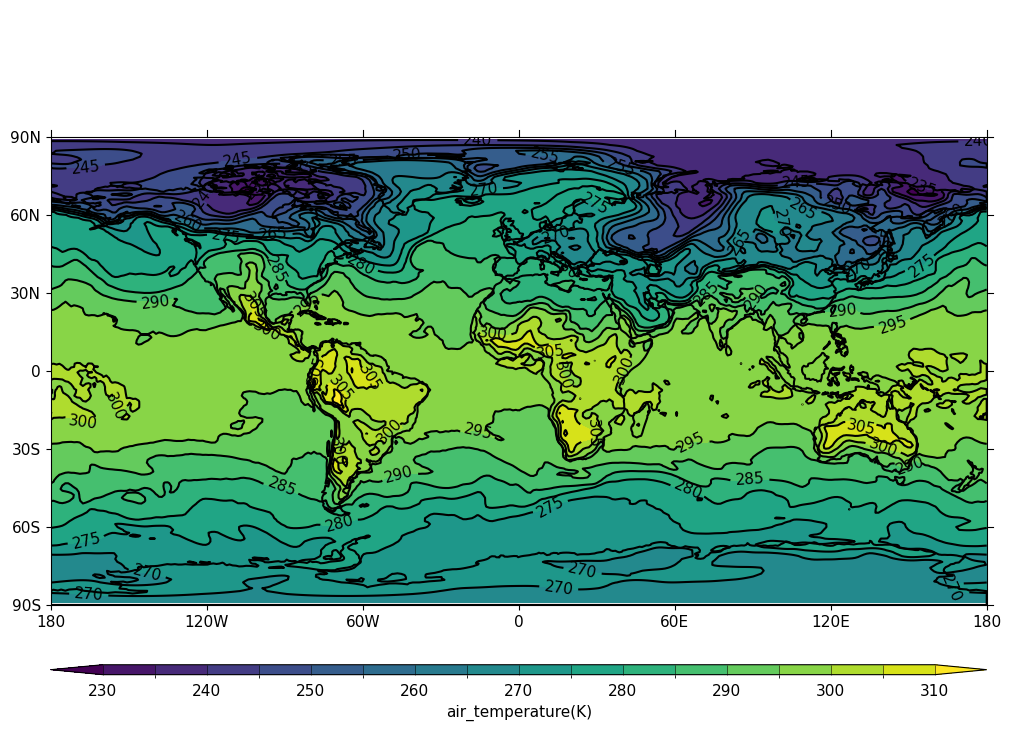

In [51]:
cfp.con(temp_field.subspace(pressure=1000.0))

Let's see what the equivalent plot would be for the subspace over a different pressure, this time the lowest 1 mbar:

In [ ]:
cfp.con(temp_field.subspace(pressure=1.0))

### b) Customising the (contour) plot

cf-plot provides numerous ways to customise a specific plot such as those above. We demonstrate just a small number here.

The second plot from the previous sub-section, in particular, has contour lines which are so dense they obscure the world map and data pattern so let's hide those which you do by specifying `lines=False` to the `con` call:

In [ ]:
cfp.con(temp_field.subspace(pressure=1.0), lines=False)

Let's also do some further customisation of the plot above, as follows:

- use a different map projection;
- set a different colour map for the data;
- move the colour bar to be vertical not horizontal;
- add a title:

In [ ]:
cfp.mapset(proj="robin") # changes the projection
cfp.cscale("plasma")  # changes the colour scale/map
cfp.con(
    temp_field.subspace(pressure=1.0),
    lines=False,
    colorbar_orientation="vertical",  # tells cf-plot to make a vertical colour bar (horizontal is the default)
    title="Air temperaure field"  # adds the specified title
)

We might want to view a smaller section of the data, say over Australia only. We can do this in two ways:

1. by reducing the data further; or
2. by specifying to cf-plot to only show a smaller window on the data.

For (1), instead of a subspace on just pressure, we also suspace on X and Y i.e. longitude and latitude, to reduce those axes. We can use `cf.wi` which specifies a 'within' condition. First, define the extrema of both of these we want to view, for example these are those longitudes and latitudes which provide a view centered around Australia:

In [ ]:
cfp.mapset() # resets the projection
lonmin = 110
lonmax = 155
latmin = -45
latmax = -5

Now do method (1) from above, via a subspace on three axes, pressure (as before) as well as longitude and latitude (new). Note we could do each subspace via a separate call, but they can also be done together in one call like so:

In [ ]:
# Do further subspacing to reduce the latitude and longitude with cf-python
fsub_all = temp_field.subspace(
    pressure=1.0,
    longitude=cf.wi(lonmin, lonmax),
    latitude=cf.wi(latmin, latmax)
)

# Plot the above
cfp.con(fsub_all, lines=False)

Method (2) can be achieved by setting the keyword arguments to the cf-plot `mapset` method like so:

In [ ]:
cfp.mapset(lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax)
cfp.con(temp_field.subspace(pressure=1.0), lines=False)

Note the differences in colour shades between the two plots from the different approaches are because in approach (2) cf-plot normalises the colour map extent of the data to only account for the area shown.

### c) Making a vector plot with basic customisation

Finally let's make some vector plots. Notice our final two fields from the read-in fieldlist are in eastward and northward components, therefore can be combined into vectors from these vector components:

In [ ]:
print(wind_u_field)
print(wind_v_field)

Again we need to subspace in pressure so that we have an effective 2D not 4D space that can be visualised as a contour plot.
This time let's take our subspace at 500 mbar pressure:

In [ ]:
u = wind_u_field.subspace(pressure=500.0)
v = wind_v_field.subspace(pressure=500.0)

To make a vector plot using cf-plot, use the `vect` function:

In [ ]:
cfp.mapset()  # reset the mapping settings, including map projection
cfp.vect(u=u, v=v)

We can mostly just see black here! This is expected and because we need to customise the vector spacing. There are clearly too many vectors shown they overwhelm the plot area, so use the `scale` and `stride` keyword arguments to `vect` to edit the size and spacing of the vector arrows respectively:

In [ ]:
cfp.vect(u=u, v=v, scale=100, stride=4)  # much better - found these values after playing around with values

Like for contour plotting, we can focus in on specific areas of the data in space via the two methods covered there. In the vector plot case, note we may need to adjust the vector spacing and size again for optimal viewing.

In [ ]:
cfp.mapset(lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax) # also resets the projection to 'cyl'
cfp.vect(u=u, v=v)

Trial and error for vector size and spacing gives a nicer result for the above plot with:

In [ ]:
cfp.vect(u=u, v=v, scale=50, stride=1)  # better than the above!

***

## 5. Analysing data: applying mathematical and statistical operations and plotting trends

**In this section we demonstrate how to do some data analysis including performing arithmetic and statistical calculations on the data, showing how cf-python's CF Conventions metadata awareness means that the metadata is automatically updated to account for the operations that are performed.**

As well as the statistics you can calculate and explore from collapsing fields in section (3c), you can ...

### a) Applying mathematics e.g. arithmetic and trigonometry on fields

We will use another dataset to demonstrate this, to remind of the `read` function and fieldlist unpacking from section one:

In [ ]:
monthly_field = cf.read("../ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc")[0]
print(monthly_field)
print(monthly_field.data)

You can perform arithmetical operations on fields using the usual operators, e.g. let's multiply the field's underlying data by 2 and subtract 10 from it to illustrate:

In [ ]:
double_minus_ten_monthly_field = 2 * monthly_field - 10
print(double_minus_ten_monthly_field)
print(double_minus_ten_monthly_field.data)

You can apply mathematical operations too via various available methods. Let's try some rounding and trigonometry as an illustration:

In [ ]:
round_monthly_field = monthly_field.round()
print(round_monthly_field.data)

In [ ]:
cosine_monthly_field = monthly_field.cos()
print(cosine_monthly_field)

Note the units change appropriately with some operations, again showcasing cf-python's metadata awareness.

### b) Line plotting

Often we want to pick out statistical trends from a subspace of the data. cf-python has season-selecting and season-collapsing methods to help you determine information on a per-season basis (as well as month-selecting methods to do the same for specific months, though we don't try any of those here).

Firstly, let's show a line plot of our data averaged across the whole spatial area, so we can see the overall pattern. You can produce a line plot with cf-plot using the `lineplot` function, where the argument should be a field with a 1D series (ignoring any 1D axes such as latitude and longitude in our case which after the collapse become 1D):

In [ ]:
spatial_mean_monthly_field = monthly_field.collapse("area: mean")
print(spatial_mean_monthly_field)

cfp.lineplot(spatial_mean_monthly_field)

### c) Calculating seasonal means

This data looks like it has trends on different time scales e.g. due to seasons. Let's pick some of those out using cf-python. We select two of the four seasons, using the `djf` and `jja` methods like so:

In [ ]:
get_djf_season = cf.djf()  # specific collapse type for the months of December, January, February
get_jja_season = cf.jja()  # specific collapse type for the months of June, July, August

Then we collapse on these only using the `group` keyword argument to the `collapse` method, which we call a 'grouped collapse':

In [ ]:
djf_season_mean = spatial_mean_monthly_field.collapse("T: mean", group=get_djf_season)  # mean across DJF season
cfp.lineplot(djf_season_mean)

In [ ]:
jja_season_mean = spatial_mean_monthly_field.collapse("T: mean", group=get_jja_season)  # mean across JJA season
cfp.lineplot(jja_season_mean)

### d) Plotting the seasonal means on one (line)plot

To put those seasonal averages into context from the original data, it would be nice to plot them on top of the original line plot. We can do that using cf-plot, as an example of some more advanced cf-plot plotting capability. If you want to plot multiple aspects on one plot in this way, wrap the calls to the functions to plot such as `con` or `vect` or `lineplot` with the opening and closing functions `gopen` and `gclose`, like so:

In [ ]:
cfp.gopen()
# By adding the 'label' argument, we allow labels for the corresponding line on the plot legend
cfp.lineplot(spatial_mean_monthly_field, label="Original monthly data (spatial mean)")
cfp.lineplot(djf_season_mean, label="Mean over the DJF months of the original spatial mean")
cfp.lineplot(jja_season_mean, label="Mean over the JJA months of the original spatial mean")
cfp.gclose()

***

## 6. Changing the underlying grid of data through regridding

**In this section we demonstrate how to change the underlying grid of the data to another grid which could be a higher- or lower- resolution one, or a completely different grid, which is called regridding or interpolation, and indicate various options cf-python supports for doing this.**

### a) Getting a _source_ field ready to regrid

We read in a precipitation field and inspect it:

In [ ]:
higher_res_field = cf.read("../ncas_data/precip_2010.nc")[0]
print(higher_res_field)

To get a feel for the data we have, let's view a basic subspace as a contour plot. Note we use the `blockfill` argument set to `True` which changes the contour plot to plot the data on a cellular basis rather than filled as smoothed contours (whether or not the contour lines are set to be shown from the `lines` argument, in this case we turn those off too):

In [ ]:
cfp.mapset()  # reset
cfp.cscale("precip_11lev")  # using a colour scale good for precipitation data
cfp.con(higher_res_field[0], blockfill=True, lines=False)

### b) Getting the _destination_ field: another field in order to regrid the previous _onto its grid_

Now we read in another precipitation field and inspect it. The key thing to note is that it is lower resolution than the previous one we read:

In [ ]:
lower_res_field = cf.read("../ncas_data/model_precip_DJF_means_low_res.nc")[0]
print(lower_res_field)

Again, get a feel for the data we have from a view of a basic subspace, to confirm that it is lower resolution (notice the larger cell blocks than before):

In [ ]:
cfp.cscale("precip_11lev")
cfp.con(lower_res_field[0], blockfill=True, lines=False)

### c) Performing the regrid operation from the source to the destination fields

Now the key step after the previous setup: regridding the first (*source*) field to the grid of the second (*destination*) field. We use the `regrids` method of cf-python to do this, where the `s` in the name stands for spherical for spherical regridding, as opposed to Cartesian regridding, also possible with cf-python.

We are going to do two calls, demonstrating two different methods of interpolation, namely the `patch` and `conservative` methods. Assign these to variables so we can compare them next:

In [ ]:
patch_regridded_field = higher_res_field.regrids(lower_res_field, method="patch")
conservative_regridded_field = higher_res_field.regrids(lower_res_field, method="conservative")

These two methods do not give the same results!

In [ ]:
patch_regridded_field.equals(conservative_regridded_field)

Recall how to do field arithmetic. We use subtraction to indicate the difference between the two regridded outcomes which differ only by the interpolation method used to regrid:

In [ ]:
difference_field = patch_regridded_field - conservative_regridded_field

### d) Finally, some more advanced cf-plot plotting to compare the source, destination, and regridded results

As with the previous section, let's end by doing more advanced cf-plot plotting to show all of the relevant fields to help us to understand what the regridding did.

Again we are using `gopen` and `gclose` wrapped around our calls to plot. This time we use `gpos` function calls which tell cf-plot exactly where we want to place each plot on the overall canvas. In this case, from our `x` and `y` extrema inputs `xmin`, `xmax`, `ymin` and `ymax`, we are building an effective 4 x 4 grid to place the four contour plots we will show.

There is a lot to take in here, but the main thing is to understand that we use `con` to generate four contour plots corresponding to different stages of our regridding, telling cf-plot to place them at one of the four places in a 4 x 4 grid, with some customisation of colour scales and colour bar levels.

Note here we are taking the [0] index subspace of all of the fields to plot, but we can use any other subspace of the data to view instead:

In [ ]:
cfp.cscale("viridis")  # reset cmap to perceptually uniform scale
cfp.gopen(rows=2, columns=2, figsize=[7, 15])  #, bottom=0.1, top=0.85)

# Confiure first three plots
cfp.mapset()  # reset from previous plots in the notebook - standalone don't need this
cfp.levs(min=0, max=500, step=50)

# First three plots
cfp.gpos(xmin=0.1, xmax=0.5, ymin=0.55, ymax=1.0)
cfp.cscale("precip_11lev")
cfp.con(
    higher_res_field[0], blockfill=True, lines=False,
    title="Precipitation field\nbefore regridding",
)
cfp.gpos(xmin=0.55, xmax=0.95, ymin=0.55, ymax=1.0)
cfp.con(
    patch_regridded_field[0], blockfill=True, lines=False,
    title="...and after regridding with\nthe patch recovery method",
)
cfp.gpos(xmin=0.1, xmax=0.5, ymin=0.1, ymax=0.55)
cfp.con(
    conservative_regridded_field[0], blockfill=True, lines=False,
    title="...and after regridding with\nthe conservative method",
)
cfp.gpos(xmin=0.55, xmax=0.95, ymin=0.1, ymax=0.55)

# This final plot is showing the diff so is a bit different, apply some cf-plot plotting config.
cfp.levs()
cfp.cscale("BlueDarkRed18")  # is a diff so use a diverging colourmap
cfp.con(
    difference_field[0], blockfill=True, lines=False,
    title="Difference between the two\nregridding methods is:",
)
cfp.gclose()

More generally, using regridding with cf-python you can convert from one grid to another very different grid, e.g. from a tripolar to a regular or rotated latitude-longitude grid or vice-versa, including to/from unstructured grids (UGRID grids).

***

## Conclusion and recap of learning objectives

The NCAS CF Data Tools are a suite of Python libraries which are designed to facilitate working with data for research in the earth sciences and aligned domains. We learnt today about the cf-python (https://ncas-cms.github.io/cf-python/) and cf-plot (https://ncas-cms.github.io/cf-plot/build/). The 'cf' in the names of the NCAS CF Data Tools corresponds to the CF Conventions, a metadata standard becoming the de-facto convention across geoscience to cover the description of data so that sharing and intercomparison is simpler.

Our **learning aim** was to be able to use the NCAS CF Data Tools Python libraries, namely cf-python and cf-plot to process, analyse and visualise netCDF and PP datasets, whilst appreciating the context and 'unique selling point' of the libraries as being built to use the CF Conventions, a metadata standard for earth science data, to make it simpler to do what you want to do with the datasets, by working on top of a Data Model for CF.

For our **learning objectives**, we practiced using cf-python and cf-plot to:

* read dataset(s) and view the (meta)data at different detail levels;
* edit the (meta)data and write out the edited version to file;
* reduce datasets by subspacing and collapsing;
* visualise datasets as contour and vector plots;
* analyse data: applying mathematical and statistical operations and plotting trends;
* change the underlying grid of data through regridding.

***

## Where to find more information and resources on the NCAS CF Data Tools

Here are some links relating to the NCAS CF Data Tools and this training.

* This training, with further material, is hosted online and there are instructions for setting up the environment so you can work through it in your own time: https://github.com/NCAS-CMS/cf-tools-training.
* The cf-python documentation lives at https://ncas-cms.github.io/cf-python/.
* The cf-python code lives on GitHub at https://github.com/NCAS-CMS/cf-python. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-python/issues.
* The cf-plot documentation lives at https://ncas-cms.github.io/cf-plot/build/.
* The cf-plot code lives on GitHub at https://github.com/NCAS-CMS/cf-plot. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-plot/issues.
* There is a technical presentation about the NCAS CF Data Tools avaialble from https://hps.vi4io.org/_media/events/2020/summer-school-cfnetcdf.pdf.
* The website of the CF Conventions can be found at https://cfconventions.org/.
* The landing page for training into the CF Conventions is found here within the website above: https://cfconventions.org/Training/.

If you have any queries after this course, please either use the Issue Trackers linked above or you can email me at: sadie.bartholomew@ncas.ac.uk.

***